# **Trabalho 2 - Reconhecimento de Padrões**
### Árvore de Decisão
##### Renan Henrique Cardoso - 379013

In [1]:
import pandas as pd                        # Utilizado para converter o .mat e trabalhar também com dataframes
import seaborn as sns                      # Plotagem
import matplotlib.pyplot as plt            # Plotagem
import itertools
import math
pd.options.mode.chained_assignment = None  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
wines = pd.read_csv("https://raw.githubusercontent.com/cardosorrenan/reconhecimentopadroes-ufc/master/wine.csv")
wines.columns = ['Class', 'Alcohol', 'Acid', 'Ash', 'Alcalinity', 
                  'Magnesium', 'TotPhenols', 'Flavanoids', 'NonflavPhenols', 
                  'Proanth', 'ColIntensity', 'Hue', 'OD', 'Proline']
wines.head()

,Class,Alcohol,Acid,Ash,Alcalinity,Magnesium,TotPhenols,Flavanoids,NonflavPhenols,Proanth,ColIntensity,Hue,OD,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


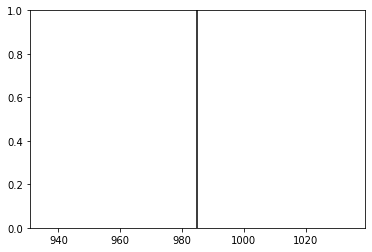

In [3]:
def log(x):
  return 0 if (x == 0) else math.log(x)

results = pd.DataFrame(columns=['Attribute', 'Threshold', 'Gain Information'])

for attribute in wines.columns[1:]:

  
  test = wines[['Class',f'{attribute}']].sort_values(['Class', f'{attribute}'], ascending=[True, True])

  thresholds = []
  thresholds.append(test.query("Class == 1")[f'{attribute}'].iloc[0])
  thresholds.append(test.query("Class == 1")[f'{attribute}'].iloc[-1])
  thresholds.append(test.query("Class == 2")[f'{attribute}'].iloc[0])
  thresholds.append(test.query("Class == 2")[f'{attribute}'].iloc[-1])
  thresholds.append(test.query("Class == 3")[f'{attribute}'].iloc[0])
  thresholds.append(test.query("Class == 3")[f'{attribute}'].iloc[-1])

  thresholds.sort()
  thresholds = thresholds[1:-1]

  n_samples = test.shape[0]
  p_class1 = test.query('Class == 1').shape[0]/n_samples
  p_class2 = test.query('Class == 2').shape[0]/n_samples
  p_class3 = test.query('Class == 3').shape[0]/n_samples
  entropy_dataset = - p_class1 * log(p_class1) - p_class2 * log(p_class2) - p_class3 * log(p_class3) 

  

  for th in thresholds:
    partition1 = test.query(f'{attribute} <= {th}')
    n_partition1 = partition1.shape[0]
    p1_class1 = partition1.query('Class == 1').shape[0]/n_partition1
    p1_class2 = partition1.query('Class == 2').shape[0]/n_partition1
    p1_class3 = partition1.query('Class == 3').shape[0]/n_partition1
    entropy_part1 = - p1_class1 * log(p1_class1) - p1_class2 * log(p1_class2) - p1_class3 * log(p1_class3) 

    partition2 = test.query(f'{attribute} > {th}')
    n_partition2 = partition2.shape[0]
    p2_class1 = partition2.query('Class == 1').shape[0]/n_partition2
    p2_class2 = partition2.query('Class == 2').shape[0]/n_partition2
    p2_class3 = partition2.query('Class == 3').shape[0]/n_partition2
    entropy_part2 = - p2_class1 * log(p2_class1) - p2_class2 * log(p2_class2) - p2_class3 * log(p2_class3) 

    n_test = test.shape[0]
    entropy_splitting = (n_partition1/n_test) * entropy_part1 + (n_partition2/n_test) * entropy_part2
    gain_info = entropy_dataset - entropy_splitting
    
    row = { 'Attribute': attribute, 'Threshold': th , 'Gain Information': gain_info }
    results = results.append(row, ignore_index=True)

plt.axvline(x=results['Threshold'].max(), color='black')

In [8]:
results.sort_values(by='Gain Information').max()

Attribute           TotPhenols
Threshold                  985
Gain Information      0.448471
dtype: object

(-2.0, 2.0)

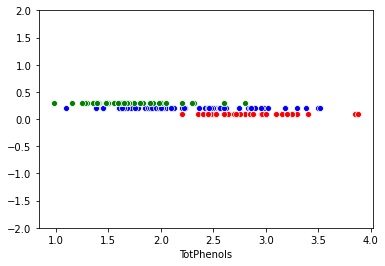

In [7]:
attribute = 'TotPhenols'
sns.scatterplot(y=0.1, x=wines.query("Class == 1")[f'{attribute}'], color='red')
sns.scatterplot(y=0.2, x=wines.query("Class == 2")[f'{attribute}'], color='blue')
sns.scatterplot(y=0.3, x=wines.query("Class == 3")[f'{attribute}'], color='green')
plt.ylim(-2, 2)